## Задание 1

- Загрузите датасет с сайта Kaggle.com. googleplaystore с помощью пандас
- изучите датасет, выявите ошибки, пропущенные значения и дубликаты
- очистите и заполните пропущенные значения и дубликаты


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("googleplaystore.csv")


In [3]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
mean_rating = df["Rating"].mean()
mean_rating


4.193338315362443

In [7]:
df["Rating"] = df["Rating"].fillna(mean_rating)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.loc[df["Installs"] == "Free"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
index_to_shift = df[df["Installs"] == "Free"].index[0]
index_to_shift


10472

In [11]:
df.iloc[index_to_shift, 1] = "ART_AND_DESIGN"
df.iloc[index_to_shift, 2] = 1.9
df.iloc[index_to_shift, 3] = 19.0
df.iloc[index_to_shift, 4] = "3.0M"
df.iloc[index_to_shift, 5] = "1,000"
df.iloc[index_to_shift, 6] = "Free"
df.iloc[index_to_shift, 7] = 0
df.iloc[index_to_shift, 8] = "Everyone"
df.iloc[index_to_shift, 9] = "Art & design"
df.iloc[index_to_shift, 10] = "February 11, 2018"
df.iloc[index_to_shift, 11] = "1.0.19"
df.iloc[index_to_shift, 12] = "4.0 and up"


In [12]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,1.9,19.0,3.0M,"1,000",Free,0,Everyone,Art & design,"February 11, 2018",1.0.19,4.0 and up


In [13]:
df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(int)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [15]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])


In [16]:
df["Price"] = df["Price"].str.replace("$", "").astype(float)


In [17]:
df["Reviews"] = df["Reviews"].str.replace("M", "000000").str.replace("K", "000").replace("dfdf", "0").replace("", "0").fillna("0").astype(int)


In [18]:
mean_size = df["Size"].str.replace("M", "000000").str.replace("k", "000").str.replace(".", "").str.replace("Varies with device", "0").astype(float).mean().round(0)
mean_size


32874471.0

In [19]:
df["Size"] = df["Size"].str.replace("M", "000000").str.replace("k", "000").str.replace(".", "").str.replace("Varies with device", f"{mean_size}").astype(float)


In [20]:
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int32         
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int32         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1016.5+ KB


In [22]:
duplicates = df.duplicated()
duplicates.sum()


483

In [23]:
df = df.drop_duplicates()
duplicates = df.duplicated()
duplicates.sum()


0

## Задание 2

- разведочный анализ
- визуализация данных, распределения, закономерности
- сводная статистика, корреляция, статистический анализ


In [24]:
apps = df[["Category", "Rating", "Reviews", "Size", "Price", "Last Updated", "Installs"]]
apps.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Category      10358 non-null  object        
 1   Rating        10358 non-null  float64       
 2   Reviews       10358 non-null  int32         
 3   Size          10358 non-null  float64       
 4   Price         10357 non-null  float64       
 5   Last Updated  10358 non-null  datetime64[ns]
 6   Installs      10358 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 566.5+ KB


In [25]:
import seaborn as sns


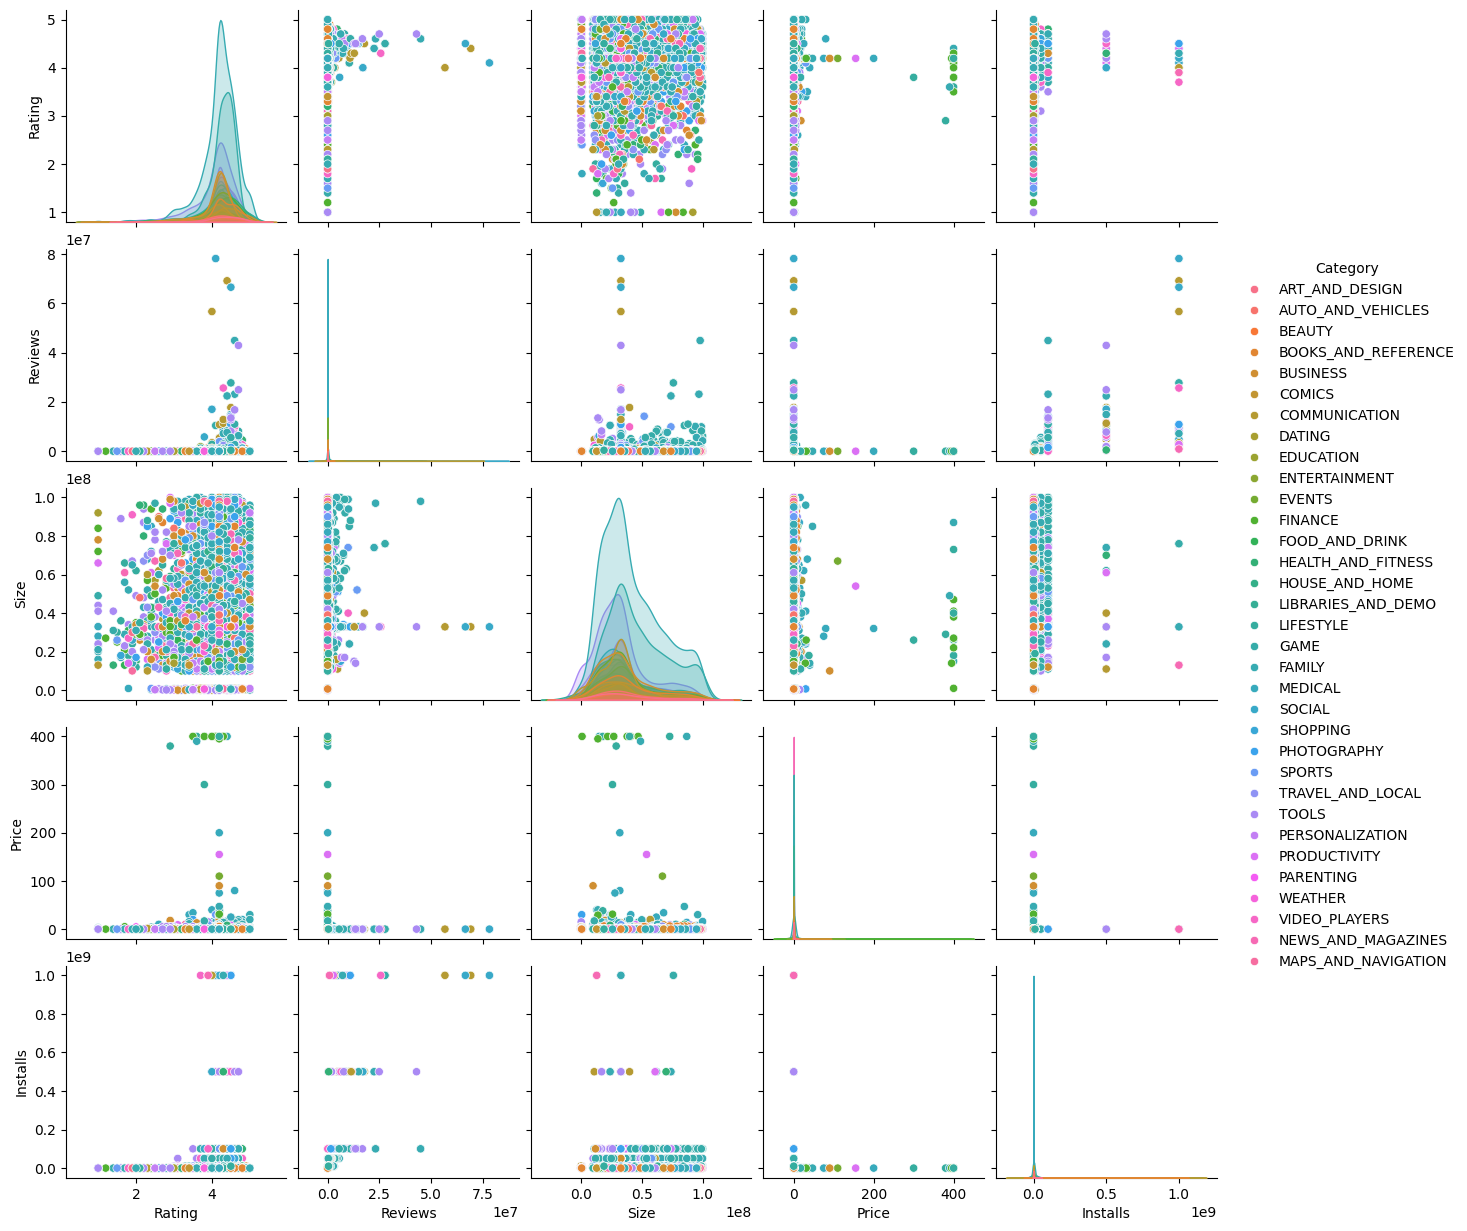

In [26]:
sns.pairplot(apps, hue="Category")


In [27]:
df.to_csv("googleplaystore_cleaned.csv", index=False)


In [28]:
df = pd.read_csv("googleplaystore_cleaned.csv")


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [30]:
df = df.loc[df["Installs"] <= 1000000]


In [31]:
import matplotlib.pyplot as plt


In [32]:
category_counts = df["Category"].value_counts()
category_counts


Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           66
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

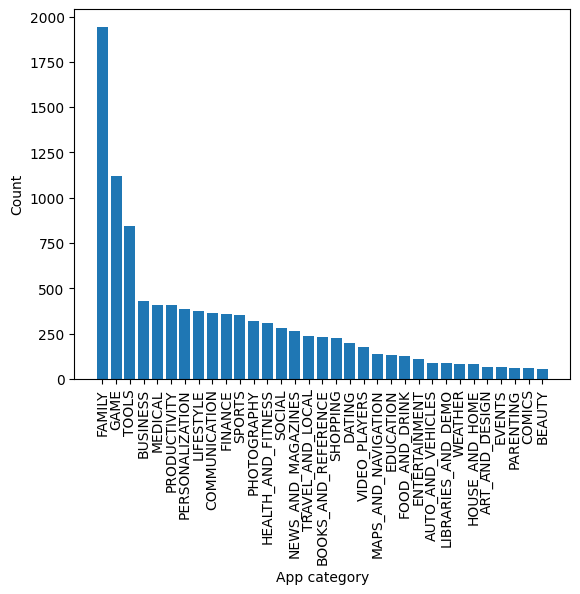

In [33]:
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel("App category")
plt.ylabel("Count")
plt.show()


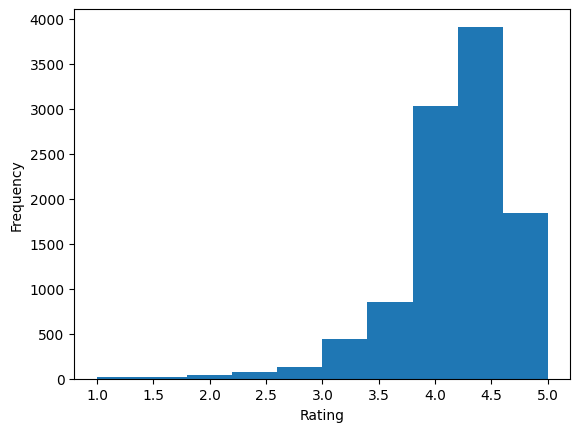

In [34]:
plt.hist(df["Rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


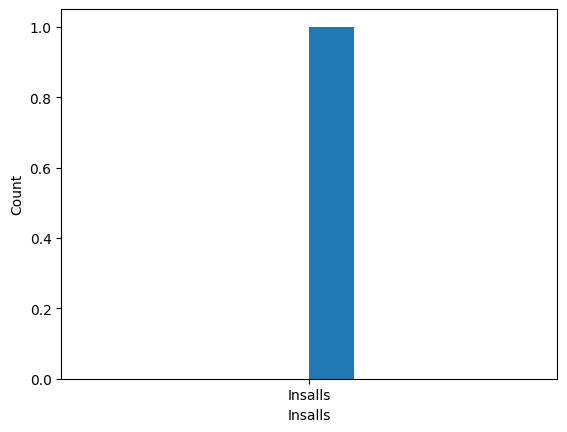

In [35]:
plt.hist("Insalls", bins=10)
plt.xlabel("Insalls")
plt.ylabel("Count")
plt.show()


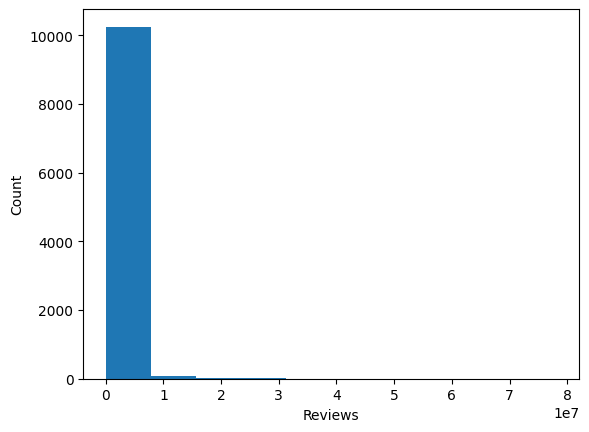

In [36]:
plt.hist(df["Reviews"], bins=10)
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()


In [37]:
summury_stats = df[["Category", "Rating", "Reviews", "Size", "Price", "Last Updated", "Installs"]].describe()
summury_stats


,Rating,Reviews,Size,Price,Installs
count,10358.000000,1.035800e+04,1.035800e+04,10357.000000,1.035800e+04
mean,4.188428,4.058654e+05,3.809364e+07,1.030800,1.415639e+07
std,0.484522,2.696651e+06,2.325150e+07,16.278625,8.023580e+07
min,1.000000,0.000000e+00,1.100000e+04,0.000000,0.000000e+00
25%,4.100000,3.200000e+01,2.100000e+07,0.000000,1.000000e+03
50%,4.200000,1.678500e+03,3.287447e+07,0.000000,1.000000e+05
75%,4.500000,4.640425e+04,5.000000e+07,0.000000,1.000000e+06
max,5.000000,7.815831e+07,1.000000e+08,400.000000,1.000000e+09


## Задание 3

- найти выбросы
- удаление и винсоризация выбросов
- стандартизация данных


In [38]:
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [39]:
z_scores = stats.zscore(df["Installs"])
z_scores


0       -0.176319
1       -0.170211
2       -0.114124
3        0.446750
4       -0.175197
           ...   
10353   -0.176381
10354   -0.176442
10355   -0.176431
10356   -0.176431
10357   -0.051805
Name: Installs, Length: 10358, dtype: float64

In [40]:
threshold = 3
outliers = df["Installs"][z_scores > threshold]
df.loc[z_scores > threshold, "Installs"] = df["Installs"].mean()  # заменить выбросы средним значением или медианным .median()


C:\Users\Alexey\AppData\Local\Temp\ipykernel_12704\2656617828.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14156392.694245994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, "Installs"] = df["Installs"].mean()  # заменить выбросы средним значением или медианным .median()


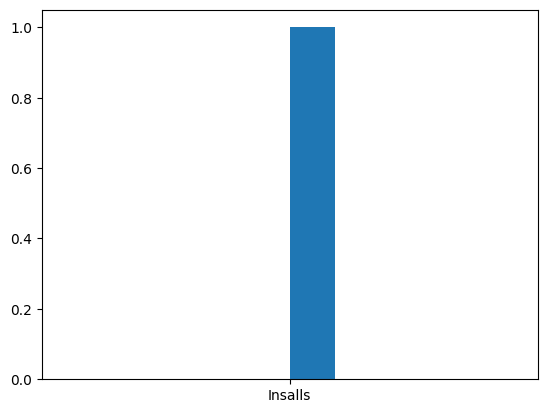

In [41]:
plt.hist("Insalls")
plt.show()


In [43]:
z_scores = stats.zscore(df["Reviews"])
threshold = 3
outliers = df["Reviews"][z_scores > threshold]
df.loc[z_scores > threshold, "Reviews"] = df["Reviews"].median()


In [49]:
reviews_df = df.loc[df["Reviews"] <= 1_000_000]  # удалить выбросы


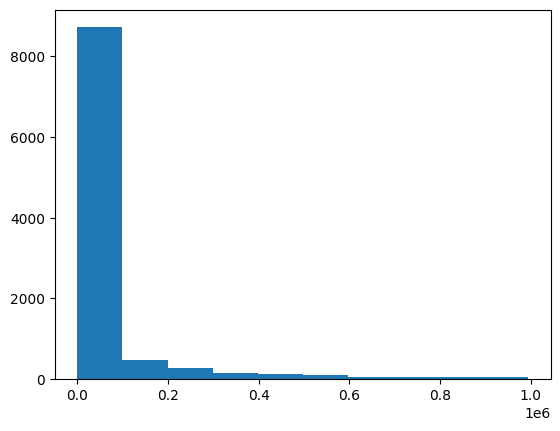

In [50]:
plt.hist(reviews_df["Reviews"])
plt.show()


In [51]:
df["Ratiing"] = winsorize(df["Rating"], limits=[0.1, 0.1])


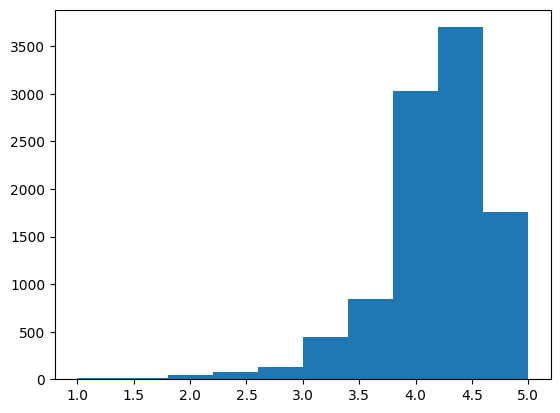

In [52]:
plt.hist(reviews_df["Rating"])
plt.show()


In [56]:
scaler = StandardScaler()  # стандартизировать данные
df["Raing"] = scaler.fit_transform(df["Rating"].values.reshape(-1, 1))


In [57]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ratiing,Raing
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1,-0.182515
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9,-0.595313
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7,1.055878
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.5,0.643080
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.3,0.230283


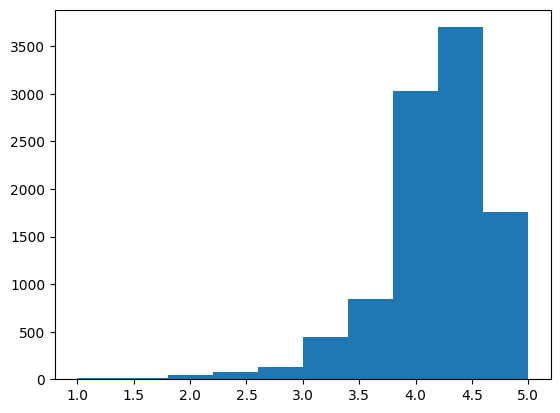

In [54]:
plt.hist(reviews_df["Rating"])
plt.show()


## Задание 4

- label encoding к столбцу Type с помощью класса LabelEncoder from sklean.preprocessing import LabelEncoder. Создать столбец Type_Encoded
- one-hot encoding к столбцу Content Rating с помощью метода get_dummies from pandas. Используйте параметр columns, чтобы указать столбец для кодирования как Content Rating и установите параметр prefix d ContentRaing/ Задать параметр drop_first со значением True, чтобы отбросить первый загодированный столбец во избежание мультиколлинеарности.
- Создайте таблицу pivot с именем pivot_table для анализа средних оценок на основе категории приложения и рейтинга контента Teen/ Установите параметр index в Category, параметр columns в ContentRating_Teen, параметра values в Rating, ф параметр aggfunc в meanю

Выведите рузультирующую сводную таблицу.


In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
df = pd.read_csv("googleplaystore_cleaned.csv")


In [60]:
le = LabelEncoder()
df["Type_Encoded"] = le.fit_transform(df["Type"])  # закодировать столбец «Тип»


In [61]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0


In [62]:
df = pd.get_dummies(df, columns=["Content Rating"], prefix="ContentRating", drop_first=True)  # encode the "Content Rating" column закодировать столбец «Content Rating»


In [63]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,True,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,True,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,0,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,True,False,False,False,False


In [64]:
pivot_table = df.pivot_table(index="Category", columns="ContentRating_Teen", values="Rating", aggfunc="mean")
pivot_table


ContentRating_Teen,False,True
Category,,
ART_AND_DESIGN,4.306032,4.466667
AUTO_AND_VEHICLES,4.190715,4.200000
BEAUTY,4.272668,4.064446
BOOKS_AND_REFERENCE,4.313175,4.299683
BUSINESS,4.133126,4.226157
COMICS,4.228597,4.031818
COMMUNICATION,4.146747,4.282152
DATING,4.008030,4.116003
EDUCATION,4.371266,4.800000
